In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [73]:
df = pd.read_excel('driver.xlsx', na_values=['#NAME?'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 17 columns):
ID                              30240 non-null int64
target                          30240 non-null int64
Gender                          30240 non-null object
EngineHP                        30240 non-null int64
credit_history                  30240 non-null int64
Years_Experience                30240 non-null int64
annual_claims                   30240 non-null int64
Marital_Status                  30240 non-null object
Vehical_type                    30240 non-null object
Miles_driven_annually           30232 non-null float64
size_of_family                  30240 non-null int64
Age_bucket                      30240 non-null object
EngineHP_bucket                 30240 non-null object
Years_Experience_bucket         30240 non-null object
Miles_driven_annually_bucket    30232 non-null object
credit_history_bucket           30240 non-null object
State                           3

In [74]:
# Class count
count_class_1, count_class_0 = df.target.value_counts()

# Divide by class
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

In [75]:
#Under sampling the target value 1 
count_class_1

21396

In [76]:
df_class_1_under = df_class_1.sample(count_class_0)

In [77]:
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print('Random under-sampling:')
print(df_test_under.target.value_counts())

Random under-sampling:
1    8844
0    8844
Name: target, dtype: int64


In [78]:
df = df_test_under

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = df.columns[2:]
X = df[labels]
y = df['target']

In [80]:
todummy_list = ['Gender', 'Marital_Status', 'Vehical_type', 'Age_bucket', 'EngineHP_bucket', 'Years_Experience_bucket', 'Miles_driven_annually_bucket', 'credit_history_bucket', 'State']

# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x,)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

X = dummy_df(X, todummy_list)

In [81]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

# Now check again to see if you still have missing data
X.isnull().sum().sort_values(ascending=False).head()

C:\Users\Sky\Anaconda3\envs\mini-project\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


State_WY                             0
credit_history_bucket_Exceptional    0
Years_Experience_bucket_15-30        0
Years_Experience_bucket_3-8'         0
Years_Experience_bucket_9-14'        0
dtype: int64

In [82]:
X

,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family,Gender_F,Gender_M,Marital_Status_Married,Marital_Status_Single,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,434.0,601.0,1.0,0.0,6925.0,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,158.0,674.0,23.0,1.0,5901.0,6.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.0,711.0,11.0,0.0,5204.0,7.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,297.0,651.0,2.0,3.0,83848.0,4.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,95.0,764.0,21.0,0.0,13032.0,5.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,90.0,697.0,35.0,1.0,11904.0,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,87.0,713.0,22.0,1.0,10996.0,4.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,101.0,770.0,16.0,0.0,12951.0,4.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,136.0,809.0,2.0,2.0,14973.0,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,319.0,352.0,3.0,3.0,21072.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
features = X.values
targets = y.values

In [84]:
targets

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

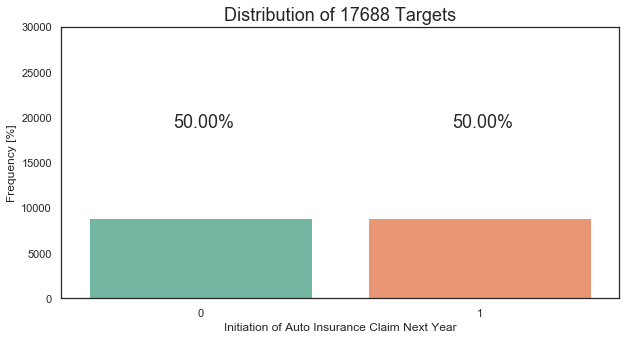

In [85]:
ax = sns.countplot(x = targets ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=30000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(targets)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of 17688 Targets')
plt.xlabel('Initiation of Auto Insurance Claim Next Year')
plt.ylabel('Frequency [%]')
plt.show()

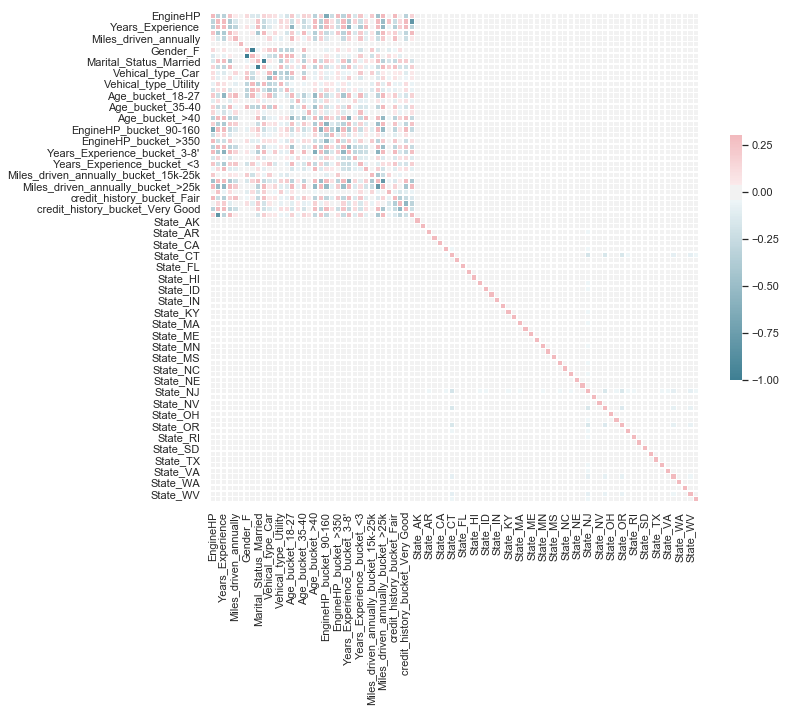

In [86]:
sns.set(style="white")


# Compute the correlation matrix
corr = X.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [87]:
# Define the gini metric - from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703#5897
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [88]:
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=42)

In [89]:
#XGBoost parameter
# More parameters has to be tuned. Good luck :)
params = {
    'min_child_weight': 10.0,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.65,
    'num_boost_round' : 700
    }